## FrozenLake Project
### CSPB 3202 Summer 2020
### Greg Giordano

# Imports

In [2]:
import gym
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding

from rl.agents.dqn import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

# Q Learning

In [3]:
#function for training
def q_learn(env, episodes, epsilon, learning_rate, gamma, min_epsilon, decay, log_interval, rolling):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n)) #initialize empty Q table
    rewards = [] #list to track rewards
    
    for i in range(episodes + 1): #number of training episodes
        state = env.reset()
        done = False

        while not done:
            #env.render()
            if random.uniform(0, 1) < epsilon:
                #random action
                action = random.randrange(env.action_space.n)
            else:
                #optimal action
                action = np.argmax(Q[state, :])

            new_state, reward, done, prob = env.step(action) 
            Q[state, action] = Q[state, action] + learning_rate * ((reward + gamma * np.max(Q[new_state, :])) - (Q[state, action]))
            state = new_state

            if done:
                epsilon = max(min_epsilon, epsilon * decay) #decrease epsilon
                rewards.append(reward)
                
        if i % log_interval == 0: #track training progress
            print('Episode', i, 'complete')
        
        plt.plot(pd.Series(rewards).rolling(rolling).mean()) #plot performance
        plt.title('Rolling Average of Last 100 Rewards vs. Number of Episodes')
        plt.xlabel('Training Episodes (#)')
        plt.ylabel('Average Reward')

    
    print('')
    print('Final Q Table:')
    print(Q)
    print('')
    return Q


#function for testing
def q_test(env, Q, tests):
    reward = 0
    rewards = []

    for i in range(tests):
        state = env.reset()
        done = False

        while not done:
            action = np.argmax(Q[state, :])
            state, reward, done, prob = env.step(action)

            if reward == 1:
                rewards.append(reward)

    print((len(rewards)/tests) * 100, '% of tests completed successfully') 
    return(rewards)

## Deterministic FrozenLake-v0
Reach the goal without falling in a hole. Actions are deterministic. 4x4 grid.

In [3]:
env = gym.make('FrozenLake-v0', is_slippery=False)
env.render()


SFFF
FHFH
FFFH
HFFG


Episode 0 complete
Episode 1000 complete
Episode 2000 complete
Episode 3000 complete
Episode 4000 complete
Episode 5000 complete

Final Q Table:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.47195079 0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]

100.0 % of tests completed successfully


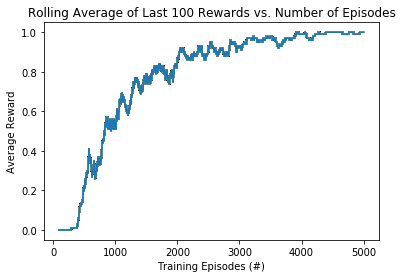

In [5]:
env = gym.make('FrozenLake-v0', is_slippery=False)
episodes = 5000
epsilon = 0.99
learning_rate = 0.8
gamma = 0.9
min_epsilon = 0.01
decay = 0.999
log_interval = 1000
rolling = 100
tests = 100

Q = q_learn(env, episodes, epsilon, learning_rate, gamma, min_epsilon, decay, log_interval, rolling)
rewards = q_test(env, Q, tests)

## FrozenLake-v0
Reach the goal without falling in a hole. Actions are NOT deterministic. 4x4 grid.

In [7]:
env = gym.make('FrozenLake-v0', is_slippery=True)
env.render()


SFFF
FHFH
FFFH
HFFG


Episode 0 complete
Episode 1000 complete
Episode 2000 complete
Episode 3000 complete
Episode 4000 complete
Episode 5000 complete
Episode 6000 complete
Episode 7000 complete
Episode 8000 complete
Episode 9000 complete
Episode 10000 complete

Final Q Table:
[[3.81235422e-02 2.79396729e-03 8.35230093e-04 9.68161595e-04]
 [1.05394980e-04 2.82819393e-05 1.08161954e-04 2.73227124e-02]
 [5.74975115e-05 1.15932382e-04 4.29544027e-05 2.42364545e-02]
 [8.13582680e-06 2.64329986e-05 4.75779785e-06 1.82807643e-02]
 [1.80811609e-01 4.99016192e-03 1.02459823e-04 3.65023500e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.22827459e-02 1.65883475e-07 3.12721045e-07 3.31478378e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.79280116e-04 1.16605382e-02 2.07449290e-03 1.29735869e-01]
 [1.19625054e-02 4.37503719e-02 1.82954541e-02 1.69049884e-03]
 [2.76499293e-02 2.04404236e-04 7.95756817e-03 1.23136418e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00

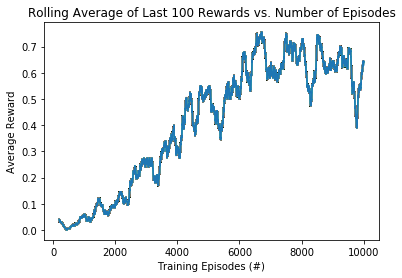

In [8]:
env = gym.make('FrozenLake-v0', is_slippery=True)
episodes = 10000
epsilon = 0.99
learning_rate = 0.8
gamma = 0.9
min_epsilon = 0.001
decay = 0.999
log_interval = 1000
rolling = 200
tests = 100

Q = q_learn(env, episodes, epsilon, learning_rate, gamma, min_epsilon, decay, log_interval, rolling)
rewards = q_test(env, Q, tests)

## Deterministic FrozenLake8x8-v0
Reach the goal without falling in a hole. Actions are deterministic. 8x8 grid.

In [9]:
env = gym.make('FrozenLake8x8-v0', is_slippery=False)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Episode 0 complete
Episode 1000 complete
Episode 2000 complete
Episode 3000 complete
Episode 4000 complete
Episode 5000 complete
Episode 6000 complete

Final Q Table:
[[0.22876792 0.25418658 0.25418658 0.22876792]
 [0.22876792 0.28242954 0.28242954 0.25418658]
 [0.25418658 0.3138106  0.3138106  0.28242954]
 [0.28242954 0.34867844 0.34867844 0.3138106 ]
 [0.3138106  0.38742049 0.38742049 0.34867844]
 [0.34867844 0.43046721 0.43046721 0.38742049]
 [0.38742049 0.4782969  0.4782969  0.43046721]
 [0.43046721 0.531441   0.4782969  0.4782969 ]
 [0.25418658 0.28242954 0.28242954 0.22876792]
 [0.25418658 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.         0.38742049 0.3138106 ]
 [0.34867844 0.43046721 0.43046721 0.34867844]
 [0.38742049 0.4782969  0.4782969  0.38742049]
 [0.43046721 0.531441   0.531441   0.43046721]
 [0.4782969  0.59049    0.531441   0.4782969 ]
 [0.28242954 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844

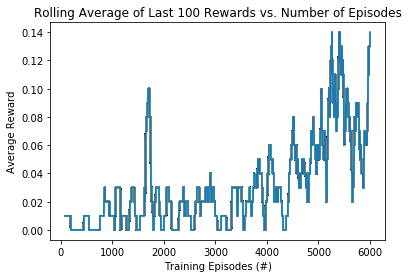

In [11]:
env = gym.make('FrozenLake8x8-v0', is_slippery=False)
episodes = 6000
epsilon = 1.0
learning_rate = 0.8
gamma = 0.9
min_epsilon = 0.01
decay = 0.9999
log_interval = 1000
rolling = 100
tests = 100

Q = q_learn(env, episodes, epsilon, learning_rate, gamma, min_epsilon, decay, log_interval, rolling)
rewards = q_test(env, Q, tests)

## FrozenLake8x8-v0
Reach the goal without falling in a hole. Actions are NOT deterministic. 8x8 grid.

In [4]:
env = gym.make('FrozenLake8x8-v0', is_slippery=True)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Episode 0 complete
Episode 5000 complete
Episode 10000 complete
Episode 15000 complete
Episode 20000 complete

Final Q Table:
[[3.37164396e-03 5.96052873e-03 8.80327710e-03 5.93677952e-03]
 [5.88976290e-03 3.39392330e-03 5.71349133e-03 1.18973263e-02]
 [5.21431161e-03 6.15531308e-03 1.68365479e-02 7.14768260e-03]
 [1.22794901e-02 8.30848510e-03 2.16841780e-02 1.14801378e-02]
 [1.48523648e-02 1.84305481e-02 2.66669050e-02 1.28724762e-02]
 [2.37332433e-02 2.35411755e-02 2.67986347e-02 2.58187379e-02]
 [2.69865179e-02 2.27910335e-02 2.70397511e-02 2.21702149e-02]
 [2.39601967e-02 2.10434507e-02 2.03951852e-02 2.36365100e-02]
 [3.01532513e-03 3.49212096e-03 4.31080503e-03 6.10415903e-03]
 [6.20143046e-03 5.05625628e-03 4.67994214e-03 3.87186458e-03]
 [3.44328137e-03 3.58828584e-03 4.11335866e-03 8.66288345e-03]
 [5.39037479e-03 1.96299413e-03 3.06329988e-03 1.67666679e-02]
 [1.90723496e-02 2.05223454e-02 2.50231836e-02 2.44973439e-02]
 [1.88428556e-02 2.27413215e-02 2.46563152e-02 3.085781

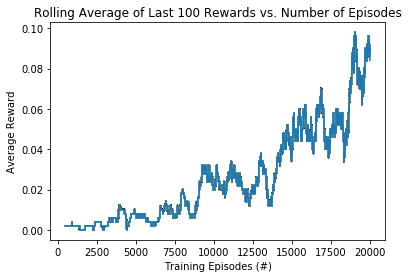

In [5]:
env = gym.make('FrozenLake8x8-v0', is_slippery=True)
episodes = 20000
epsilon = 1.0
learning_rate = 0.8
gamma = 0.9
min_epsilon = 0.01
decay = 0.9999
log_interval = 5000
rolling = 500
tests = 100

Q = q_learn(env, episodes, epsilon, learning_rate, gamma, min_epsilon, decay, log_interval, rolling)
rewards = q_test(env, Q, tests)

# Deep Q Network

## FrozenLake-v0
Reach the goal without falling in a hole. Actions are NOT deterministic. 4x4 grid.

In [6]:
env = gym.make('FrozenLake-v0', is_slippery=True)
env.render()


SFFF
FHFH
FFFH
HFFG


In [8]:
env = gym.make('FrozenLake-v0', is_slippery=True)
model = Sequential()
model.add(Embedding(env.observation_space.n, env.action_space.n, input_length=1))
model.add(Reshape((env.action_space.n, )))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 4)              64        
_________________________________________________________________
reshape_2 (Reshape)          (None, 4)                 0         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [37]:
memory = SequentialMemory(limit=20000, window_length=1)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1, value_min=0.1, value_test=0.05, nb_steps=20000)
DQN = DQNAgent(model=model, nb_actions=env.action_space.n, memory=memory, nb_steps_warmup=500, target_model_update=1e-2, policy=policy, enable_double_dqn=False, batch_size=128)
DQN.compile(Adam())

In [38]:
DQN.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=2000)

Training for 20000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 12s 6ms/step - reward: 0.0015
245 episodes - episode_reward: 0.012 [0.000, 1.000] - loss: 0.011 - mean_q: 0.525 - mean_eps: 0.944 - prob: 0.333

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 13s 7ms/step - reward: 0.0020
210 episodes - episode_reward: 0.019 [0.000, 1.000] - loss: 0.012 - mean_q: 0.559 - mean_eps: 0.865 - prob: 0.333

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 13s 7ms/step - reward: 0.0040
187 episodes - episode_reward: 0.043 [0.000, 1.000] - loss: 0.013 - mean_q: 0.575 - mean_eps: 0.775 - prob: 0.333

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 13s 7ms/step - reward: 0.0045
191 episodes - episode_reward: 0.047 [0.000, 1.000] - loss: 0.013 - mean_q: 0.597 - mean_eps: 0.685 - prob: 0.333

Interval 5 (8000 steps performed)
2000/2000 [==============================] -

In [39]:
hist = DQN.test(env, nb_episodes=100, visualize=False)
print((sum(hist.history['episode_reward']) / 100) * 100, '% of tests completed successfully')

Testing for 100 episodes ...
Episode 1: reward: 1.000, steps: 75
Episode 2: reward: 0.000, steps: 16
Episode 3: reward: 1.000, steps: 100
Episode 4: reward: 0.000, steps: 14
Episode 5: reward: 0.000, steps: 100
Episode 6: reward: 1.000, steps: 17
Episode 7: reward: 0.000, steps: 100
Episode 8: reward: 1.000, steps: 38
Episode 9: reward: 1.000, steps: 26
Episode 10: reward: 1.000, steps: 47
Episode 11: reward: 1.000, steps: 8
Episode 12: reward: 1.000, steps: 11
Episode 13: reward: 1.000, steps: 60
Episode 14: reward: 1.000, steps: 10
Episode 15: reward: 1.000, steps: 13
Episode 16: reward: 1.000, steps: 21
Episode 17: reward: 0.000, steps: 100
Episode 18: reward: 0.000, steps: 34
Episode 19: reward: 1.000, steps: 18
Episode 20: reward: 1.000, steps: 18
Episode 21: reward: 1.000, steps: 78
Episode 22: reward: 1.000, steps: 35
Episode 23: reward: 0.000, steps: 26
Episode 24: reward: 0.000, steps: 100
Episode 25: reward: 1.000, steps: 39
Episode 26: reward: 1.000, steps: 33
Episode 27: re

## FrozenLake8x8-v0
Reach the goal without falling in a hole. Actions are NOT deterministic. 8x8 grid.

In [40]:
env = gym.make('FrozenLake8x8-v0', is_slippery=True)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [41]:
env = gym.make('FrozenLake8x8-v0', is_slippery=True)
model = Sequential()
model.add(Embedding(env.observation_space.n, env.action_space.n, input_length=1))
model.add(Reshape((env.action_space.n, )))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1, 4)              256       
_________________________________________________________________
reshape_3 (Reshape)          (None, 4)                 0         
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [42]:
memory = SequentialMemory(limit=20000, window_length=1)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1, value_min=0.1, value_test=0.05, nb_steps=20000)
DQN = DQNAgent(model=model, nb_actions=env.action_space.n, memory=memory, nb_steps_warmup=500, target_model_update=1e-2, policy=policy, enable_double_dqn=False, batch_size=128)
DQN.compile(Adam())

In [43]:
DQN.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=2000)

Training for 20000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 12s 6ms/step - reward: 0.0000e+00
51 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_q: 0.033 - mean_eps: 0.944 - prob: 0.333

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 13s 6ms/step - reward: 0.0000e+00
62 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_q: 0.030 - mean_eps: 0.865 - prob: 0.333

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 13s 6ms/step - reward: 0.0000e+00
51 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_q: 0.027 - mean_eps: 0.775 - prob: 0.333

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 13s 6ms/step - reward: 0.0000e+00
48 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_q: 0.024 - mean_eps: 0.685 - prob: 0.333

Interval 5 (8000 steps performed)
2000/2000 [=====================

In [44]:
hist = DQN.test(env, nb_episodes=100, visualize=False)
print((sum(hist.history['episode_reward']) / 100) * 100, '% of tests completed successfully')

Testing for 100 episodes ...
Episode 1: reward: 1.000, steps: 62
Episode 2: reward: 1.000, steps: 92
Episode 3: reward: 0.000, steps: 200
Episode 4: reward: 0.000, steps: 126
Episode 5: reward: 1.000, steps: 58
Episode 6: reward: 1.000, steps: 97
Episode 7: reward: 1.000, steps: 58
Episode 8: reward: 1.000, steps: 51
Episode 9: reward: 0.000, steps: 56
Episode 10: reward: 1.000, steps: 148
Episode 11: reward: 1.000, steps: 122
Episode 12: reward: 0.000, steps: 148
Episode 13: reward: 1.000, steps: 59
Episode 14: reward: 1.000, steps: 139
Episode 15: reward: 1.000, steps: 38
Episode 16: reward: 0.000, steps: 9
Episode 17: reward: 1.000, steps: 104
Episode 18: reward: 0.000, steps: 56
Episode 19: reward: 1.000, steps: 88
Episode 20: reward: 1.000, steps: 45
Episode 21: reward: 1.000, steps: 49
Episode 22: reward: 0.000, steps: 45
Episode 23: reward: 0.000, steps: 45
Episode 24: reward: 1.000, steps: 36
Episode 25: reward: 0.000, steps: 48
Episode 26: reward: 0.000, steps: 115
Episode 27:

# Demo

In [45]:
DQN.test(env, nb_episodes=1, visualize=True)

Testing for 1 episodes ...
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Righ

# Demo .gif

<img src="vid.gif" width="750" align="center">